In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Tentukan ukuran grid gudang (misalnya, 5x5)
warehouse_rows = 5
warehouse_columns = 5

# Definisikan lokasi barang dan lokasi pengemasan
item_locations = [(0, 0), (0, 4), (4, 0), (4, 4)]
packing_location = (2, 2)

# Definisikan tindakan yang mungkin (0: up, 1: right, 2: down, 3: left)
actions = [0, 1, 2, 3]

In [3]:
# Langkah 2: Inisialisasi Q-table
q_table = np.zeros((warehouse_rows, warehouse_columns, len(actions)))
print(q_table[:,:,0])

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [4]:
# Langkah 3: Definisikan Parameter Q-learning
alpha = 0.1  # Learning rate
gamma = 0.6  # Discount factor
epsilon = 0.1  # Exploration rate

# Fungsi untuk memilih tindakan berdasarkan epsilon-greedy policy
def choose_action(state):
    if np.random.uniform(0, 1) < epsilon:
        action = np.random.choice(actions)
    else:
        action = np.argmax(q_table[state[0], state[1]])
    return action

# Fungsi untuk menentukan reward
def get_reward(state):
    if state == packing_location:
        return 10
    elif state in item_locations:
        return 1
    else:
        return -1

# Fungsi untuk mengambil tindakan dan mendapatkan status berikutnya
def take_action(state, action):
    if action == 0 and state[0] > 0:
        next_state = (state[0] - 1, state[1])
    elif action == 1 and state[1] < warehouse_columns - 1:
        next_state = (state[0], state[1] + 1)
    elif action == 2 and state[0] < warehouse_rows - 1:
        next_state = (state[0] + 1, state[1])
    elif action == 3 and state[1] > 0:
        next_state = (state[0], state[1] - 1)
    else:
        next_state = state
    return next_state

In [5]:
# Langkah 4: Implementasi Algoritma Q-learning
def q_learning(episodes):
    for episode in range(episodes):
        state = (np.random.randint(0, warehouse_rows), np.random.randint(0, warehouse_columns))
        done = False

        while not done:
            action = choose_action(state)
            next_state = take_action(state, action)
            reward = get_reward(next_state)
            old_value = q_table[state[0], state[1], action]
            next_max = np.max(q_table[next_state[0], next_state[1]])

            # Q-learning update rule
            new_value = old_value + alpha * (reward + gamma * next_max - old_value)
            q_table[state[0], state[1], action] = new_value

            state = next_state
            if state == packing_location:
                done = True


In [6]:
# Langkah 5: Pelatihan dan Evaluasi Model
q_learning(1000)
print("Q-table setelah pelatihan:")
print(q_table)

Q-table setelah pelatihan:
[[[ 2.50000000e+00  5.00000000e-01  8.23004842e-01  2.50000000e+00]
  [ 4.81436517e-01  2.46861353e+00  2.16278629e+00  2.50000000e+00]
  [ 1.22773127e+00  4.99043933e-01  7.08503005e+00  2.41717939e-01]
  [ 4.99996350e-01  2.50000000e+00  2.41147966e+00  2.40495487e+00]
  [ 2.50000000e+00  2.50000000e+00  8.05728063e-01  5.00000000e-01]]

 [[ 2.50000000e+00  3.23918214e+00  2.20810558e+00  5.34627217e-01]
  [-1.47021610e-02  7.26897658e+00  1.25937054e+00  4.34462909e-01]
  [ 2.20691121e+00  1.85125393e+00  1.38791954e+01  1.76448761e+00]
  [ 4.99999820e-01  2.45810374e-01  3.76279702e-01  7.24228077e+00]
  [ 2.50000000e+00  5.60367658e-01  3.34819411e-01  3.24847685e+00]]

 [[ 4.66787276e-01  7.07702514e+00  6.26000000e-02  4.65942333e-01]
  [ 8.83398362e-01  1.38590648e+01  1.41390224e+00  7.18748222e-01]
  [ 6.49578942e+00  1.19801993e+00  0.00000000e+00  5.59166359e-01]
  [-1.00000000e-01  1.43036367e+00  1.71283823e+00  1.38494367e+01]
  [ 5.75042328e-0

In [7]:
# Langkah 6: Visualisasi Hasil
def plot_policy(q_table):
    policy = np.argmax(q_table, axis=2)
    policy_symbols = np.full((warehouse_rows, warehouse_columns), ' ')
    for i in range(warehouse_rows):
        for j in range(warehouse_columns):
            if (i, j) == packing_location:
                policy_symbols[i, j] = 'P'
            elif (i, j) in item_locations:
                policy_symbols[i, j] = 'I'
            else:
                if policy[i, j] == 0:
                    policy_symbols[i, j] = '↑'
                elif policy[i, j] == 1:
                    policy_symbols[i, j] = '→'
                elif policy[i, j] == 2:
                    policy_symbols[i, j] = '↓'
                elif policy[i, j] == 3:
                    policy_symbols[i, j] = '←'

    print("Policy Grid:")
    print(policy_symbols)

plot_policy(q_table)

Policy Grid:
[['I' '←' '↓' '→' 'I']
 ['→' '→' '↓' '←' '←']
 ['→' '→' 'P' '←' '←']
 ['→' '↑' '↑' '↑' '↑']
 ['I' '←' '↑' '↑' 'I']]


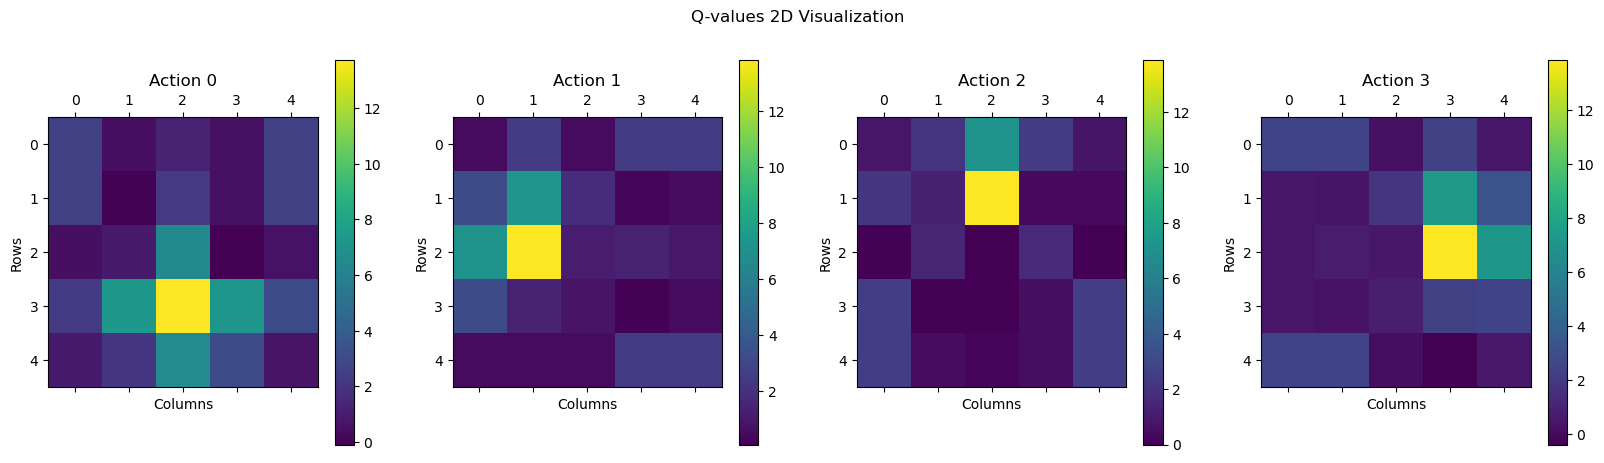

In [8]:
# Tambahkan Visualisasi 2D dari Q-table
def plot_q_table_2d(q_table):
    fig, axs = plt.subplots(1, len(actions), figsize=(20, 5))
    for action in range(len(actions)):
        ax = axs[action]
        cax = ax.matshow(q_table[:, :, action], cmap='viridis')
        fig.colorbar(cax, ax=ax)
        ax.set_title(f'Action {action}')
        ax.set_xlabel('Columns')
        ax.set_ylabel('Rows')

    plt.suptitle('Q-values 2D Visualization')
    plt.show()

plot_q_table_2d(q_table)

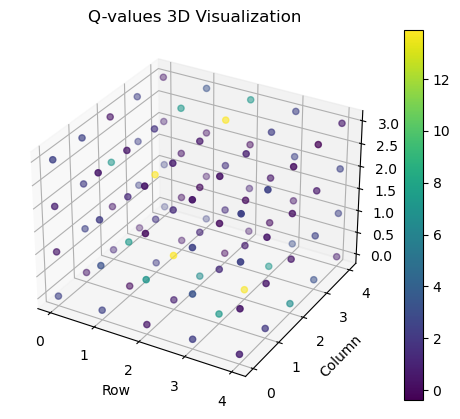

In [9]:
# Tambahkan Visualisasi 3D dari Q-table
def plot_q_table_3d(q_table):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    x, y, z, c = [], [], [], []
    
    for i in range(warehouse_rows):
        for j in range(warehouse_columns):
            for k in range(len(actions)):
                x.append(i)
                y.append(j)
                z.append(k)
                c.append(q_table[i, j, k])
    
    sc = ax.scatter(x, y, z, c=c, cmap='viridis')
    plt.colorbar(sc)
    
    ax.set_xlabel('Row')
    ax.set_ylabel('Column')
    ax.set_zlabel('Action')
    plt.title('Q-values 3D Visualization')
    plt.show()

plot_q_table_3d(q_table)